<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Health-Insurance-Cost-Prediction/blob/main/Health_Insurance_Cost_Prediction_Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de custo do Seguro de Vida

Neste Projeto, iremos criar um modelo para prever o custo do seguro de vida de uma determinada seguradora. No Brasil, apenas 17% da população adulta possui seguro de vida, sendo que 58% desse valor é referente a modalidade coletiva, que é quando a empresa fornece para seus colaboradores.

<img width=50% src='https://seguronovadigital.com.br/wp-content/uploads/2023/02/seguro-de-vida-por-invalidez.jpg'></img>

## Sobre os Dados
### Obtenção
Os dados utilizados foram disponibilizados no [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction/data).

Também é possivel importa-lo diramente da biblioteca do PyCaret ou no repositório do [GitHub](https://github.com/pycaret/pycaret/tree/master/datasets)

Esse dataset contém 1338 linhas, com 7 colunas, sendo uma dessas colunas a variável alvo.

### Dicionários de Variáveis

* Age - Idade do cliente
* Sex - Gênero do cliente
* BMI - Índice de Massa Corporal (IMC)
* Children - Quantidade de filhos
* Smoker - Se é fumante ou não
* Region - A região onde o cliente mora
* Charges - Valor pago anualmente no seguro de vida

## Configurando o Notebook

### Instalando Pacotes Necessários

Como iremos trabalhar PyCaret, precisamos instalar alguns pacotes pois o PyCaret não consta no conjunto de pacotes previamente instalados no Colab.
Por conta de algumas funções, precisamos instalar uma versão específica do *Scipy* para não termos erros durante a execução do código.

In [1]:
# instalando as bibliotecas necessárias
!pip install scipy==1.9.3
!pip install pycaret -q
!pip install mlflow -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importando os pacotes de Machine Learning
from pycaret.regression import (setup,
                                compare_models,
                                models,
                                create_model,
                                predict_model)
from pycaret.regression import (tune_model,
                                plot_model,
                                evaluate_model,
                                finalize_model)
from pycaret.regression import (save_model,
                                load_model)

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

## Análise Exploratória

Vamos começar importando o conjunto de dados, e imprimir as 5 primeiras linhas para visualizarmos como estão dispostos os dados que iremos trabalhar.

Vemos que possuimos três variáveis categóricas e quatro variáveis numéricas, o que nos indica que teremos que trabalhar com algum tipo de *Encoder*.

Nosso conjunto de dados possui 1338 linhas, 7 colunas, e nenhum dado ausente. O tipo de dado de cada coluna está correto, não havendo necessidade de tratamento dos dados.
O que iremos fazer futuramente é uma normalização dos dados da coluna `charge`.

In [5]:
# Importando os dados
DATA_PATH = 'https://raw.githubusercontent.com/gabriel-cm-saldanha/Health-Insurance-Cost-Prediction/main/insurance.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum().to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


Utilizamos a função `describe` pois ela nos fornece insights estatísticos valiosos.

Podemos observar que:
* a idade média é de 39 anos
  * possuimos um desvio padrão alto para as idades, de 14 anos;
  
* Na média as pessoas possuem 1 filho, porém a casos em que possuem 5 filhos.

* O valor médio pago é de US 13.270,42
  * com um desvio padrão de US 12.110 - valor bem alto considerando a média
  * valor mínimo de US 1.121
  * valor máximo de US 63.770,42

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Vamos começar fazendo uma análise por gênero para verificarmos se possui uma influência no custo do seguro.

Começaremos plotando um gráfico da distribuição por gênero. Após plotar o gráfico, vemos que temos uma distribuição bem equilibrada entre o número de homens e mulheres no nosso conjunto de dados.

Como estamos buscando analisar se essa variável influencia o preço do seguro, vamos criar dois dataframes, um do sexo masculino e outro referente ao sexo femino e utilizar a função `describe` para verificar se existe alguma diferença aparente entre eles.

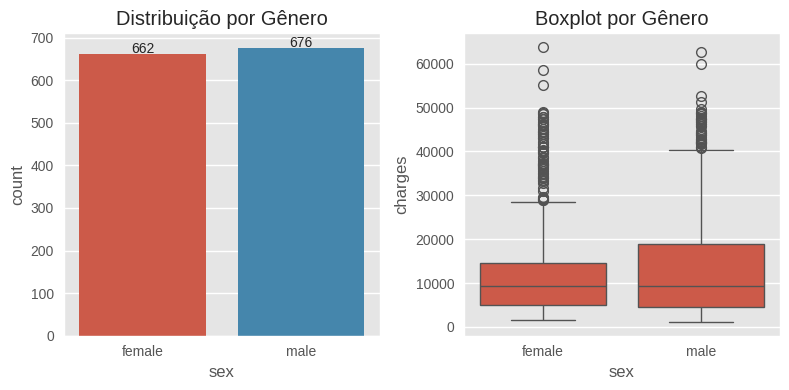

In [49]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

contagem = sns.countplot(x='sex', data=df, hue='sex', ax=ax[0])
contagem.set_title('Distribuição por Gênero')

for p in contagem.patches:
    contagem.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()+10),
                ha='center', va='center')

sns.boxplot(x='sex',y='charges', data=df, ax=ax[1])
ax[1].set_title('Boxplot por Gênero')

plt.tight_layout()
plt.show()

In [11]:
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']

In [67]:
df_combined = pd.concat([df_male.describe(), df_female.describe()], axis=1, keys=['Male', 'Female'])
df_combined.swaplevel(axis=1).sort_index(axis=1)

age                     bmi                   charges  \
           Female        Male      Female        Male        Female   
count  662.000000  676.000000  662.000000  676.000000    662.000000   
mean    39.503021   38.917160   30.377749   30.943129  12569.578844   
std     14.054223   14.050141    6.046023    6.140435  11128.703801   
min     18.000000   18.000000   16.815000   15.960000   1607.510100   
25%     27.000000   26.000000   26.125000   26.410000   4885.158700   
50%     40.000000   39.000000   30.107500   30.687500   9412.962500   
75%     51.750000   51.000000   34.313750   34.992500  14454.691825   
max     64.000000   64.000000   48.070000   53.130000  63770.428010   

                       children              
               Male      Female        Male  
count    676.000000  662.000000  676.000000  
mean   13956.751178    1.074018    1.115385  
std    12971.025915    1.192115    1.218986  
min     1121.873900    0.000000    0.000000  
25%     4619.134000    0.000000    0.000000  
50%     9369.615750    1.000000    1.000000  
75%    18989.590250    2.000000    2.000000  
max    62592.873090    5.000000    5.000000

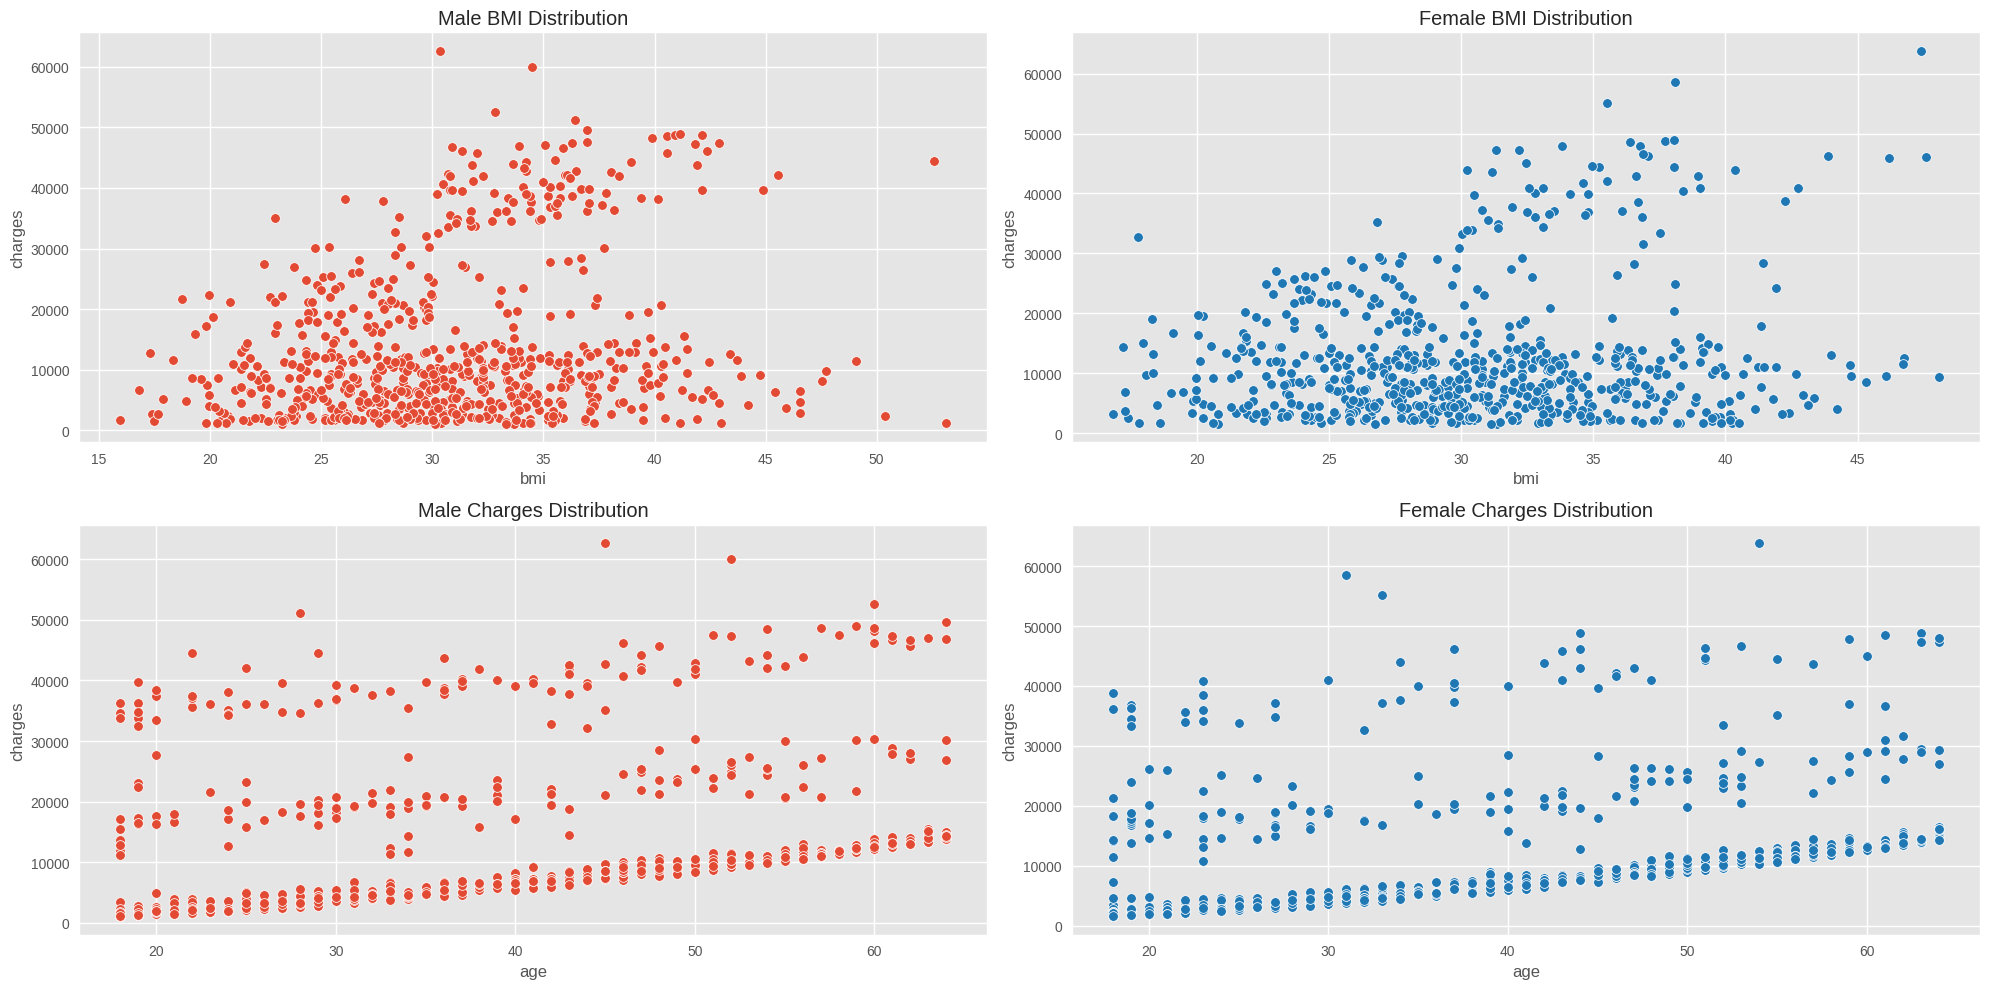

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.scatterplot(x='bmi', y='charges', data=df_male, ax=ax[0,0])
ax[0,0].set_title('Male BMI Distribution')

sns.scatterplot(x='bmi', y='charges', data=df_female, ax=ax[0,1], c='tab:blue')
ax[0,1].set_title('Female BMI Distribution')

sns.scatterplot(x='age', y='charges', data=df_male, ax=ax[1,0])
ax[1,0].set_title('Male Charges Distribution')

sns.scatterplot(x='age', y='charges', data=df_female, ax=ax[1,1], c='tab:blue')
ax[1,1].set_title('Female Charges Distribution')

plt.tight_layout()
plt.show()

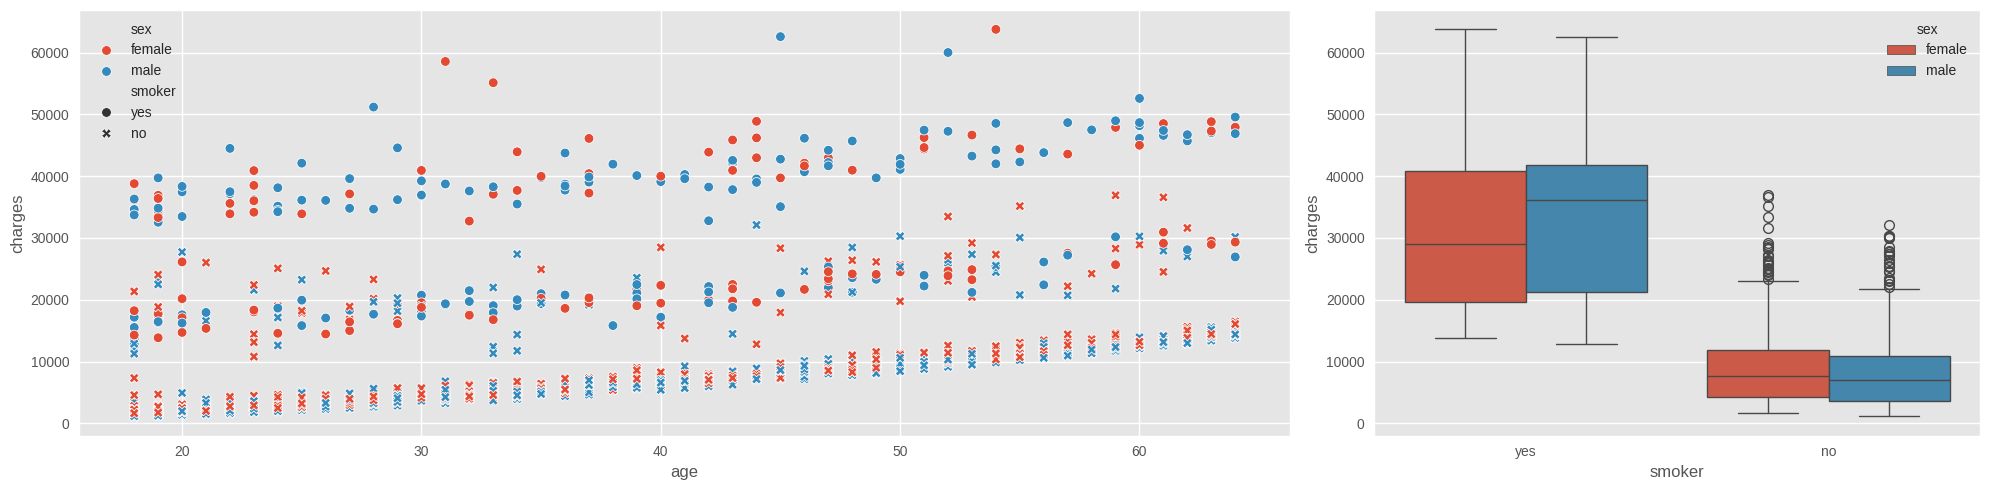

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,5), width_ratios=[2,1])
sns.scatterplot(x='age', y='charges', data=df, hue='sex', style='smoker', ax=ax[0])
sns.boxplot(x='smoker',y='charges',hue='sex', data=df, ax=ax[1])

plt.tight_layout()
plt.show()

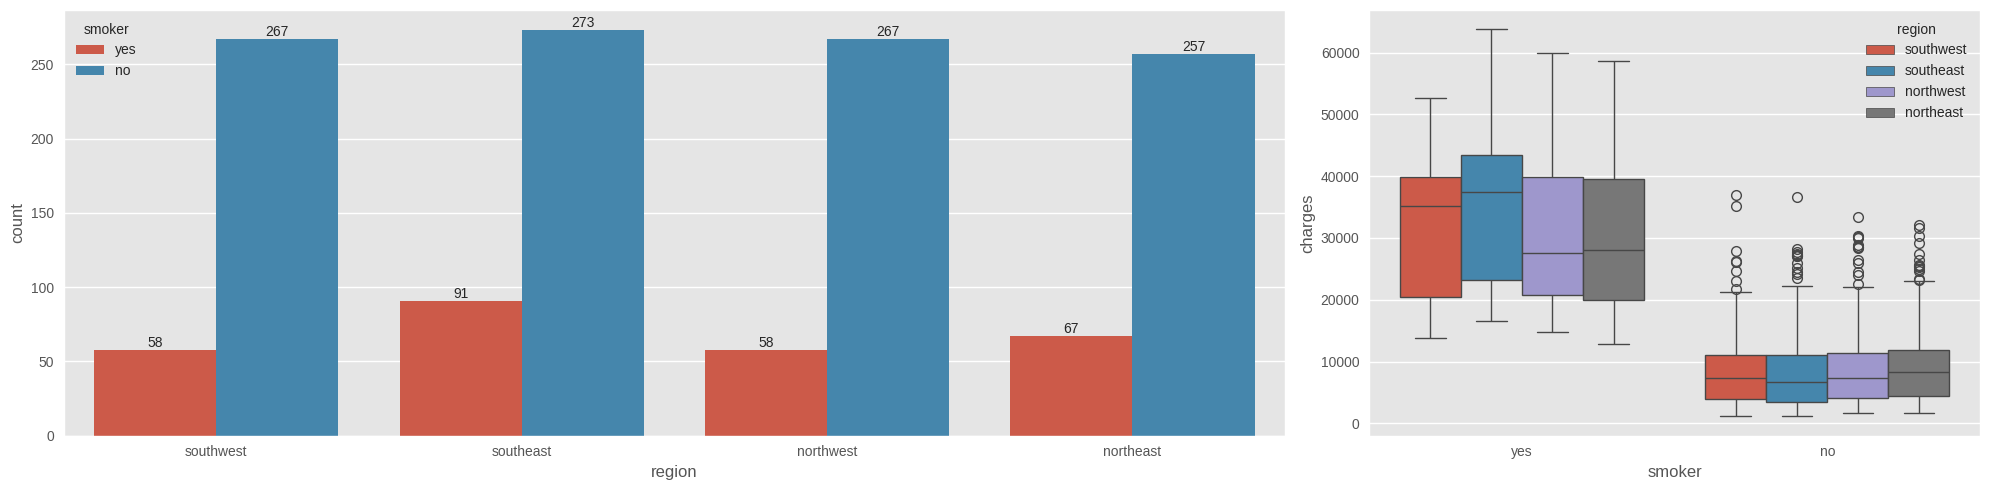

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,5), width_ratios=[2,1])

graph_1 = sns.countplot(x='region', data=df, hue='smoker', ax=ax[0])
sns.boxplot(x='smoker',y='charges',hue='region', data=df, ax=ax[1])


for p in graph_1.patches:
    if p.get_height() > 0:  # Certifique-se de que a barra é visível
        graph_1.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [17]:
df.groupby(['region','smoker'])[['charges','age']].mean()

charges        age
region    smoker                         
northeast no       9165.531672  39.536965
          yes     29673.536473  38.238806
northwest no       8556.463715  39.168539
          yes     30192.003182  39.327586
southeast no       8032.216309  38.673993
          yes     34844.996824  39.736264
southwest no       8019.284513  40.183521
          yes     32269.063494  36.103448

In [18]:
df[df['age'] >=40].groupby(['region']).count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,162,162,162,162,162,162
northwest,160,160,160,160,160,160
southeast,180,180,180,180,180,180
southwest,162,162,162,162,162,162


<Axes: xlabel='children', ylabel='charges'>

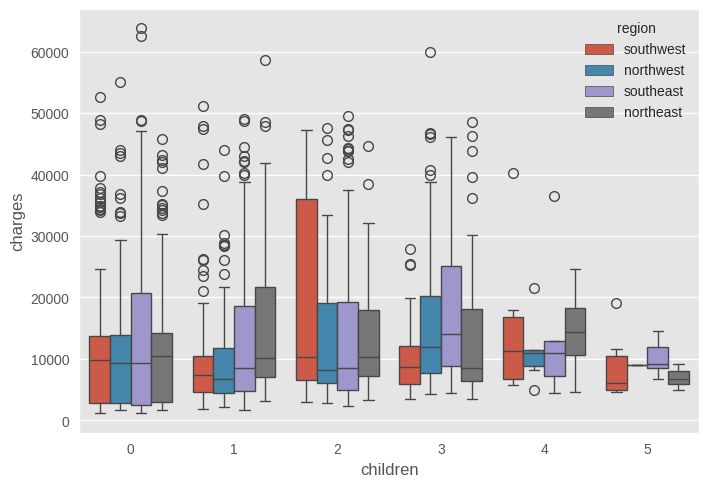

In [19]:
sns.boxplot(x='children', y='charges',hue='region', data=df)

## Machine Learning

In [20]:
# separando os dados em teste e treino
test = df.sample(frac=0.20)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)


### Criando Pipeline

In [21]:
# criando o pipeline
reg = setup(data = train,
            target = 'charges',
            normalize = True,
            log_experiment = True,
            fold_shuffle = True,
            train_size=0.7,
            experiment_name = 'sales_01')

,Description,Value
0,Session id,8859
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


2024/08/21 02:40:17 INFO mlflow.tracking.fluent: Experiment with name 'sales_01' does not exist. Creating a new experiment.


### Comparando Modelos

In [22]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2787.6410,24536232.0859,4870.7258,0.8349,0.4385,0.3125,0.2530
rf,Random Forest Regressor,2837.6541,25389340.0778,4969.5081,0.8287,0.4586,0.3263,0.3470
lightgbm,Light Gradient Boosting Machine,3047.1583,25549777.1859,5002.2678,0.8275,0.5444,0.3645,0.3640
et,Extra Trees Regressor,2867.1805,28541531.0375,5266.6260,0.8069,0.4747,0.3209,0.2900
xgboost,Extreme Gradient Boosting,3240.8605,30362597.0000,5431.7371,0.7950,0.5661,0.4091,0.4660
ada,AdaBoost Regressor,4500.8319,30615341.8977,5493.2135,0.7902,0.6412,0.7629,0.1160
knn,K Neighbors Regressor,3706.6964,35791894.6000,5934.5979,0.7590,0.4813,0.3721,0.1580
br,Bayesian Ridge,4305.2364,39078748.7238,6214.7764,0.7369,0.5972,0.4308,0.0840
llar,Lasso Least Angle Regression,4300.1605,39079341.4280,6214.8927,0.7369,0.5966,0.4298,0.0860
ridge,Ridge Regression,4302.0868,39079171.8978,6214.8641,0.7369,0.6116,0.4302,0.2840


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/08/21 02:41:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 02:41:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 02:41:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 02:41:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 02:41:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/21 02:41:15 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [23]:
print(best)

GradientBoostingRegressor(random_state=8859)


### Instanciando o Modelo

#### Sobre o Gradient Boost Regressor

In [24]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1973.2924,12276090.5334,3503.7252,0.9028,0.3548,0.2861
1,2811.6770,21548853.4554,4642.0743,0.8368,0.4182,0.3112
2,3123.3536,32247417.3284,5678.6809,0.8291,0.4755,0.3370
3,3775.3771,43751352.9029,6614.4805,0.7272,0.5533,0.3451
4,2350.2371,13767022.5331,3710.3939,0.9189,0.3715,0.3205
5,3034.5825,28090355.5392,5300.0335,0.7655,0.3992,0.3019
6,2489.1849,20110845.7365,4484.5118,0.8485,0.4414,0.2598
7,3131.8549,32066294.6715,5662.7109,0.8076,0.4908,0.3440
8,2564.6522,21050232.9406,4588.0533,0.8622,0.4377,0.2910


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/08/21 02:41:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


### Tuning do Modelo

In [25]:
tuned_gbr = tune_model(gbr, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2137.5915,13242002.3940,3638.9562,0.8951,0.3735,0.3073
1,3027.2764,25006653.1047,5000.6653,0.8107,0.4641,0.3754
2,3413.2669,30342101.5496,5508.3665,0.8392,0.4790,0.3686
3,3726.4902,41178456.3567,6417.0442,0.7432,0.5004,0.3063
4,2488.7588,14013278.6036,3743.4314,0.9175,0.3994,0.3493
5,2822.1300,25793485.8505,5078.7288,0.7846,0.3918,0.2892
6,2591.4627,19048352.9093,4364.4419,0.8565,0.4566,0.2919
7,3270.2024,32981284.5954,5742.9334,0.8021,0.4745,0.3327
8,2513.8995,19035211.8349,4362.9361,0.8754,0.4013,0.2683


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/08/21 02:42:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


### Plotando Modelo

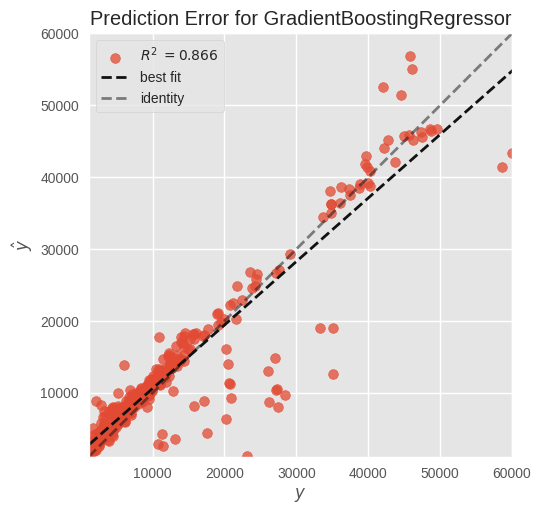

In [26]:
plot_model(gbr, plot='error')

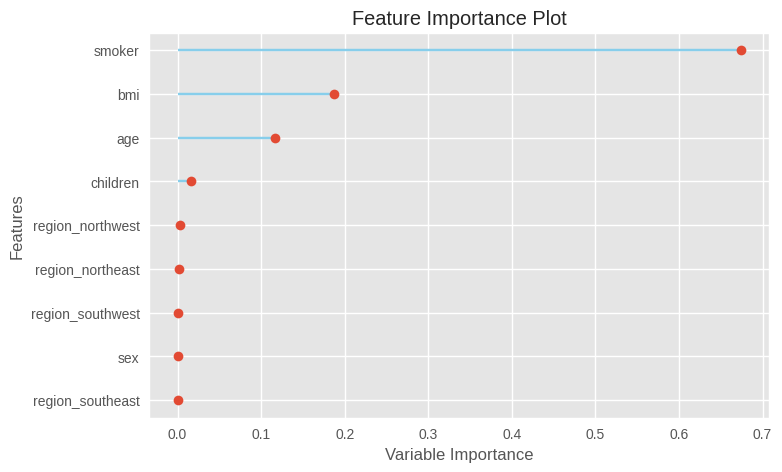

In [27]:
plot_model(gbr, plot='feature')

### Avaliação Interativa dos Modelos

In [28]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Fazendo Previsões

In [29]:
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2697.1922,20686738.7049,4548.2677,0.8624,0.4258,0.3187


### Finalizando o Modelo

In [30]:
final_gbr = finalize_model(tuned_gbr)

2024/08/21 02:42:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


### Previsão em Dados Novos

In [31]:
pred_holdout = predict_model(final_gbr, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2386.2869,17134486.7203,4139.3824,0.8713,0.4151,0.2763


In [32]:
pred_holdout.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
0,53,male,21.400000,1,no,southwest,10065.413086,11094.409320
1,46,male,38.169998,2,no,southeast,8347.164062,10604.912375
2,18,female,38.279999,0,no,southeast,1631.821167,2962.660537
3,45,female,33.099998,0,no,southwest,7345.083984,8287.040657
4,22,male,25.174999,0,no,northwest,2045.685303,2601.583796
